In [1]:
import keras 
from keras.models import load_model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
state_dict={1:"AP",2:"GJ",3:"KA",4:"PB",5:"TN"}
print(state_dict)

{1: 'AP', 2: 'GJ', 3: 'KA', 4: 'PB', 5: 'TG', 6: 'TN'}


In [3]:
def predict_next(choice):
    days=15
    df=pd.read_csv('../input/ey-models/Final six States.csv')
    X=df[state_dict[choice]]
    #print(X.shape[0])
    X_check=np.array(X[X.shape[0]-6:])
    #print(X_check.shape)
    X_check=X_check.reshape(-1,1)
    scaler=MinMaxScaler(feature_range=(0,1))
    X_check=scaler.fit_transform(X_check)
    X_check=X_check.reshape((1,6,1))
    Y_final=[]
    model=load_model("../input/ey-models/"+str(state_dict[choice])+".h5")
    for i in range(0,days):
        Y_new=model.predict(X_check)
        X_check,Y_final=update(X_check,Y_new,Y_final)
    final_prediction=scaler.inverse_transform(np.array(Y_final).reshape(days,1))
    final_prediction=final_prediction.astype("int")
    lst=["Day-"+str(i) for i in range (1,16)]
    new_df=pd.DataFrame()
    new_df["Days"]=lst
    new_df["Prediction for next 15 days"]=(final_prediction)
    print(new_df.head(15))
    fig_dims = (10, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.plot(final_prediction,c='b')
    ax.set_xlabel("Days")
    ax.set_ylabel('Prediction of Cases')
    ax.set_title("Prediction of positive cases in "+state_dict[choice]+" for the next 15 days")


In [4]:
def update(X_check,Y_new,Y_final):
    e=float(Y_new[0])
    d=X_check
    d[0,0]=0
    d[0,5]=e
    Y_final.append(e)
    X_check=d
    return X_check,(Y_final)

Select the State for which y|ou want to predict the cases!
1.Andhra Pradesh
2.Gujarat
3.Kerala
4.Punjab
5.Telangana
6.TamilNadu 
Enter the number of the state :
6
      Days  Prediction for next 15 days
0    Day-1                          893
1    Day-2                          900
2    Day-3                          901
3    Day-4                          902
4    Day-5                          902
5    Day-6                          902
6    Day-7                          903
7    Day-8                          903
8    Day-9                          903
9   Day-10                          903
10  Day-11                          903
11  Day-12                          903
12  Day-13                          903
13  Day-14                          903
14  Day-15                          903


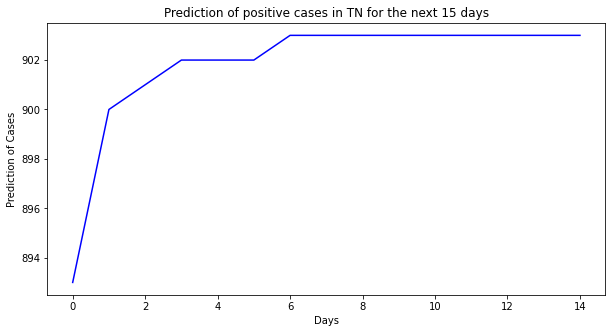

In [5]:
print("Select the State for which y|ou want to predict the cases!")
print(("1.Andhra Pradesh\n2.Gujarat\n3.Kerala\n4.Punjab\n5.Telangana\n6.TamilNadu "))
print("Enter the number of the state :")    
choice=int(input())
predict_next(choice)

Select the State for which y|ou want to predict the cases!
1.Andhra Pradesh
2.Gujarat
3.Kerala
4.Punjab
5.Telangana
6.TamilNadu 
Enter the number of the state :
5
      Days  Prediction for next 15 days
0    Day-1                          435
1    Day-2                          470
2    Day-3                          494
3    Day-4                          525
4    Day-5                          578
5    Day-6                          683
6    Day-7                          976
7    Day-8                         2151
8    Day-9                         8473
9   Day-10                        40888
10  Day-11                       203519
11  Day-12                      1017405
12  Day-13                      5091000
13  Day-14                     25480169
14  Day-15                    127532078


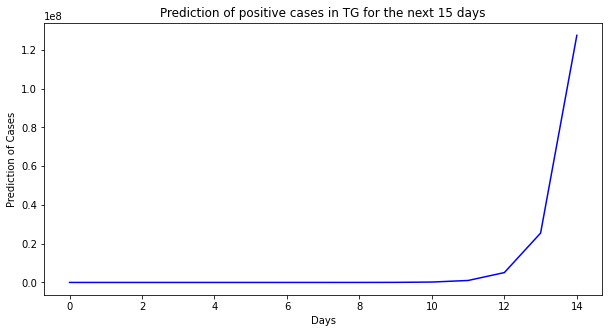

In [8]:
print("Select the State for which y|ou want to predict the cases!")
print(("1.Andhra Pradesh\n2.Gujarat\n3.Kerala\n4.Punjab\n5.TamilNadu "))
print("Enter the number of the state :")    
choice=int(input())
predict_next(choice)